## UNSUPERVISED LEARNING. 
* Simply defined?  Machine learning with no y. Just Xs
### Common methods
1. Clustering:grouping observed instances into categories depending on their inherent characteristics
2. Principle component analysis: Algorithm identifies most significant features among the data and tries to compress the observation into these features. Think of it like a bottle-neck. 

### Clustering
#### Commonly used algorithms:
    Agglomerative clustering.
    Hierarchical clustering.
    DBSCAN. 
    KMeans. 
#### K-Means Algorithm
* Achieves clustering by grouping observations into k-unique groups(k is a pre-defined number of clusters). 
* The grouping is based on Euclidean distances(common though other methods exist) of the centroids(centers) of the clusters. 
* New observations are classified according to how close they are to the centroids. 
* General equation that has to be optimized in the clustering process: 
* $argmin_s \sum_{i=1}^{k} \frac{1}{2|(S_i)|}(x-y)^2) $ :: 2 here shows that the minimization is for pairwise points in the observation
  
#### How do we select the optimum number of K?
* Measure either inertia or Distortion
* Inertia: distance from one observation to the mean of it's cluster. 
* Distortion: average of the squared distances from the cluster centers of the respective clusters.
* We can then plot a variation of these two measures above against number of clusters. 
* Select the number of clusters where there is a major change("elbow"). 

* Clustering itself is an iterative process that's highly dependent on the convergence of distance between centroids. Read more here: https://www.researchgate.net/publication/286624684_Dynamically_and_Partially_Reconfigurable_Hardware_Architectures_for_High_Performance_Microarray_Bioinformatics_Data_Analysis

![clustering_loop](clustering_cycle.png)

#### How do we evaluate our clusters?
* Multiple indices exist. 
* Common examples are Dunn Index, David Bouldin
* DB Index: the lower the better (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.davies_bouldin_score.html)
* Dunn index: the higher the better (https://www.mdpi.com/1999-4893/10/3/105)

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn import datasets
cmap = matplotlib.cm.get_cmap("Spectral")

In [8]:
iris_data = datasets.load_iris()
X,y = iris_data.data, iris_data.target
X[:5] #outputs first five rows of an array: the array represents sepal length, sepal width, petal length and petal width respectively

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

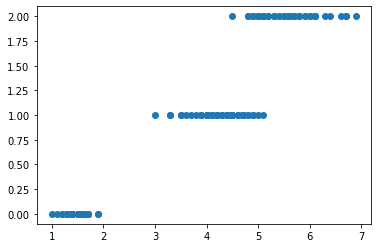

In [20]:
#quick view of our data distribution
plt.scatter(X[:,2], y)
plt.show()

Text(0, 0.5, 'Sepal width')

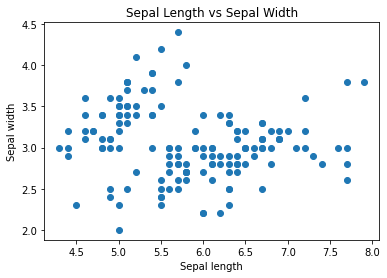

In [22]:
#comparison of two random columns
plt.scatter(X[:, 0], X[:,1])
plt.title("Sepal Length vs Sepal Width")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [27]:
distortion_values = list()
inertia_values = list()
K = range(1,10)
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions = sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1))/X.shape[0]
    distortion_values.append(distortions)
    inertia = kmeans_model.inertia_
    inertia_values.append(inertia)


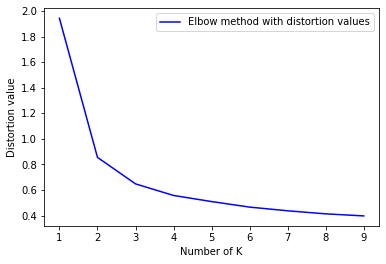

In [32]:
plt.plot(K, distortion_values, c='b', label="Elbow method with distortion values")
plt.ylabel("Distortion value")
plt.xlabel("Number of K")
plt.legend()

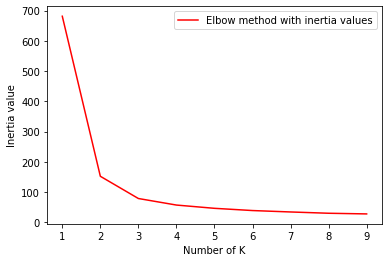

In [34]:
plt.plot(K, inertia_values, c="r", label="Elbow method with inertia values")
plt.ylabel("Inertia value")
plt.xlabel("Number of K")
plt.legend()

In [36]:
km_model = KMeans(n_clusters=3)
km_model.fit(X)
clusters = km_model.predict(X)


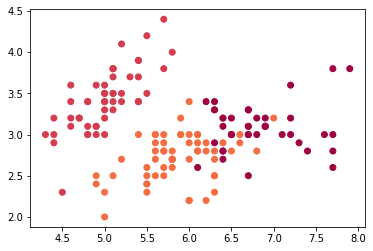

In [40]:
plt.scatter(X[:,0],X[:,1], c=[cmap(float(i) /10) for i in clusters]);